In [1]:
import pandas as pd
import numpy as np

In [2]:
from helper_classes.DatabaseHelper import get_evaluation_score

In [3]:
user_scores_version_one = get_evaluation_score('lstm_model_version_one')
user_scores_version_two = get_evaluation_score('lstm_model_version_two')
user_scores_version_three = get_evaluation_score('lstm_model_version_three')

In [4]:
lstm_model_version_one_scores = pd.DataFrame(user_scores_version_one, columns=['user_id', 'avg_precision', 'avg_recall', 'avg_mrr'])
lstm_model_version_one_scores['user_id'] = lstm_model_version_one_scores['user_id'].astype(int)
lstm_model_version_one_scores['avg_precision'] = lstm_model_version_one_scores['avg_precision'].astype(float)
lstm_model_version_one_scores['avg_recall'] = lstm_model_version_one_scores['avg_recall'].astype(float)
lstm_model_version_one_scores['avg_mrr'] = lstm_model_version_one_scores['avg_mrr'].astype(float)
lstm_model_version_one_scores.head()

,user_id,avg_precision,avg_recall,avg_mrr
0,2931938,10.00000,38.6071,31.6667
1,3383214,10.00000,50.4762,30.9524
2,3414222,10.00000,100.0000,12.5000
3,3378633,8.00000,56.6667,10.7143
4,3388128,6.92308,10.2262,13.0769


In [5]:
lstm_model_version_two_scores = pd.DataFrame(user_scores_version_two, columns=['user_id', 'avg_precision', 'avg_recall', 'avg_mrr'])
lstm_model_version_two_scores['user_id'] = lstm_model_version_two_scores['user_id'].astype(int)
lstm_model_version_two_scores['avg_precision'] = lstm_model_version_two_scores['avg_precision'].astype(float)
lstm_model_version_two_scores['avg_recall'] = lstm_model_version_two_scores['avg_recall'].astype(float)
lstm_model_version_two_scores['avg_mrr'] = lstm_model_version_two_scores['avg_mrr'].astype(float)
lstm_model_version_two_scores.head()

,user_id,avg_precision,avg_recall,avg_mrr
0,2664493,10.0,100.0,100.0000
1,2810734,10.0,100.0,25.0000
2,3253764,10.0,100.0,16.6667
3,3288934,10.0,100.0,100.0000
4,3293837,10.0,75.0,10.0000


In [6]:
lstm_model_version_three_scores = pd.DataFrame(user_scores_version_three, columns=['user_id', 'avg_precision', 'avg_recall', 'avg_mrr'])
lstm_model_version_three_scores['user_id'] = lstm_model_version_three_scores['user_id'].astype(int)
lstm_model_version_three_scores['avg_precision'] = lstm_model_version_three_scores['avg_precision'].astype(float)
lstm_model_version_three_scores['avg_recall'] = lstm_model_version_three_scores['avg_recall'].astype(float)
lstm_model_version_three_scores['avg_mrr'] = lstm_model_version_three_scores['avg_mrr'].astype(float)
lstm_model_version_three_scores.head()

,user_id,avg_precision,avg_recall,avg_mrr
0,3397659,15.0,100.0000,16.6667
1,2703031,10.0,100.0000,12.6323
2,3348787,10.0,75.0000,13.3333
3,3372815,10.0,100.0000,13.3333
4,3376011,10.0,51.4583,90.0000


In [7]:
distinct_user_count = len(lstm_model_version_one_scores)
print('Number of the unique user count: ', distinct_user_count)

Number of the unique user count:  3605


Get the number of 'hits'

In [8]:
hit_counter_version_one = np.count_nonzero(lstm_model_version_one_scores['avg_precision'])
hit_counter_version_two = np.count_nonzero(lstm_model_version_two_scores['avg_precision'])
hit_counter_version_three = np.count_nonzero(lstm_model_version_three_scores['avg_precision'])

print('Version 1: {} >> Ratio: {}'.format(hit_counter_version_one, float(hit_counter_version_one / distinct_user_count)))
print('Version 2: {} >> Ratio: {}'.format(hit_counter_version_two, float(hit_counter_version_two / distinct_user_count)))
print('Version 3: {} >> Ratio: {}'.format(hit_counter_version_three, float(hit_counter_version_three / distinct_user_count)))

Version 1: 29 >> Ratio: 0.008044382801664356
Version 2: 127 >> Ratio: 0.03522884882108183
Version 3: 89 >> Ratio: 0.024687933425797504


In [9]:
import seaborn as sns

In [10]:
def test(row):
    if (row.avg_precision > 0) and (row.avg_recall > 0) and (row.avg_mrr > 0):
        return 1
    else:
        return 0

In [11]:
lstm_model_version_one_scores['hit'] = lstm_model_version_one_scores.apply(test, axis=1)
lstm_model_version_two_scores['hit'] = lstm_model_version_two_scores.apply(test, axis=1)
lstm_model_version_three_scores['hit'] = lstm_model_version_three_scores.apply(test, axis=1)

In [12]:
number_of_hits_version_one = len(lstm_model_version_one_scores[lstm_model_version_one_scores['hit'] == 1])
number_of_hits_version_two = len(lstm_model_version_two_scores[lstm_model_version_two_scores['hit'] == 1])
number_of_hits_version_three = len(lstm_model_version_three_scores[lstm_model_version_three_scores['hit'] == 1])

print('Number of hits for version 1: ', number_of_hits_version_one)
print('Number of hits for version 2: ', number_of_hits_version_two)
print('Number of hits for version 3: ', number_of_hits_version_three)

Number of hits for version 1:  29
Number of hits for version 2:  127
Number of hits for version 3:  89


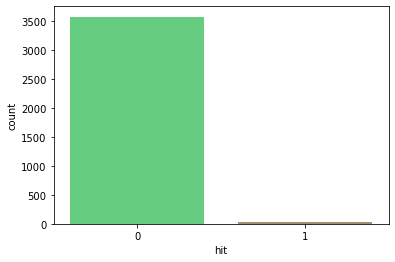

In [13]:
sns.countplot(x='hit', data=lstm_model_version_one_scores, palette='terrain')

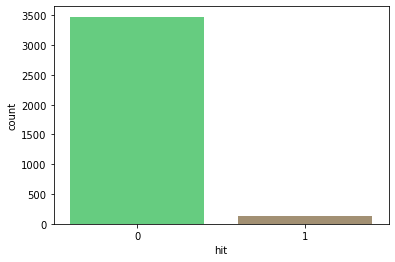

In [14]:
sns.countplot(x='hit', data=lstm_model_version_two_scores, palette='terrain')

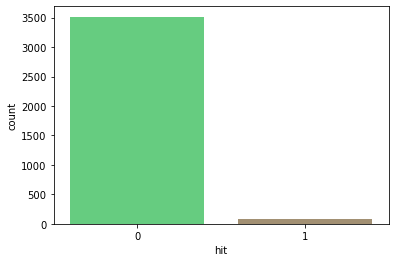

In [15]:
sns.countplot(x='hit', data=lstm_model_version_three_scores, palette='terrain')

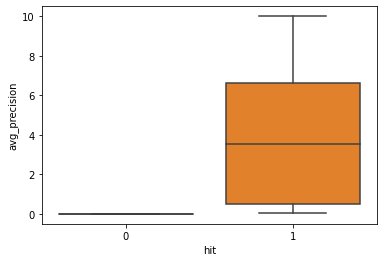

In [16]:
sns.boxplot(x='hit', y='avg_precision', data=lstm_model_version_one_scores)

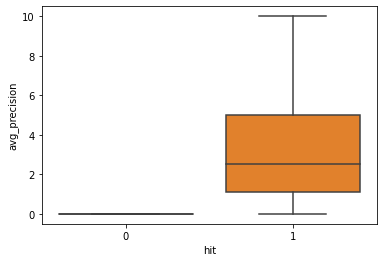

In [17]:
sns.boxplot(x='hit', y='avg_precision', data=lstm_model_version_two_scores)

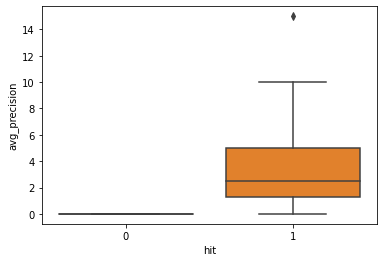

In [18]:
sns.boxplot(x='hit', y='avg_precision', data=lstm_model_version_three_scores)